## Imports

In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from sklearn.linear_model import LogisticRegression

## Get Data

In [2]:
iris = load_iris()
data = iris.data
target = iris.target

## Description

In [ ]:
print(iris.DESCR)

## 2D Plots

## 3D Plot

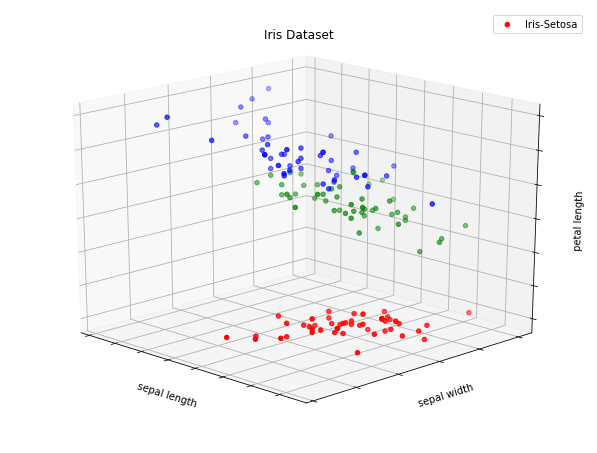

In [3]:
fig = plt.figure(1, figsize=(8, 6))
colors = ['red','green','blue']
ax = Axes3D(fig, elev=20, azim=135)
ax.scatter(data[:,0], data[:,1], data[:,2], 
           c=target, 
           cmap=matplotlib.colors.ListedColormap(colors))
ax.set_title("Iris Dataset")
ax.set_xlabel("sepal length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal length")
ax.w_zaxis.set_ticklabels([])
ax.legend(['Iris-Setosa'])

plt.show()

## SVD - Explained Variance

In [4]:
svd = TruncatedSVD(n_components=3, random_state=42)
svd.fit(data)
exp_var = svd.explained_variance_ratio_

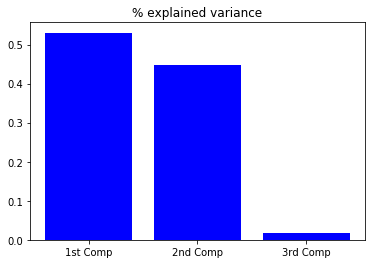

In [5]:
plt.bar(range(3), exp_var, color='blue', align='center')
plt.xticks(range(3), ('1st Comp', '2nd Comp', '3rd Comp'))
plt.title('% explained variance')
plt.show()

## Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.2, 
                                                    random_state=99,
                                                    stratify=target)

## SVD on Iris

In [7]:
svd = TruncatedSVD(n_components=2, random_state=42)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)
X_test_svd = svd.transform(X_test)

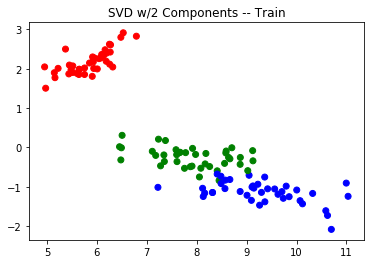

In [8]:
plt.scatter(X_train_svd[:,0], X_train_svd[:,1], 
            c=y_train, 
            cmap=matplotlib.colors.ListedColormap(colors))
plt.title('SVD w/2 Components -- Train')
plt.show()

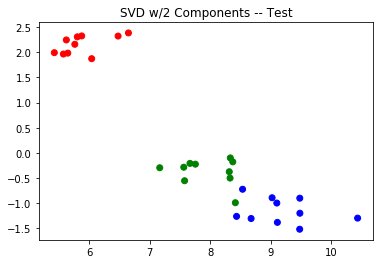

In [9]:
plt.scatter(X_test_svd[:,0], X_test_svd[:,1], 
            c=y_test, 
            cmap=matplotlib.colors.ListedColormap(colors))
plt.title('SVD w/2 Components -- Test')
plt.show()

## Modeling

In [10]:
# w/out SVD
lr1 = LogisticRegression(penalty='l2', 
                        random_state=12, 
                        multi_class='ovr')
lr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print('In-sample:{:7.3f}'.format(lr1.score(X_train, y_train)))
print('Out-sample: {:.3f}'.format(lr1.score(X_test, y_test)))

In-sample:  0.975
Out-sample: 0.933


In [12]:
# w/SVD
lr2 = LogisticRegression(penalty='l2', 
                        random_state=12, 
                        multi_class='ovr')
lr2.fit(X_train_svd, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print('In-sample:{:7.3f}'.format(lr2.score(X_train_svd, y_train)))
print('Out-sample: {:.3f}'.format(lr2.score(X_test_svd, y_test)))

In-sample:  0.967
Out-sample: 0.967


## Images

In [ ]:
# Read image and convert to grayscale
img = Image.open('/Users/davidziganto/images/f35.jpg')
imggray = img.convert('LA')

fig = plt.figure(figsize=(18, 12)) ## Figure object
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.imshow(imggray);
plt.show()

In [ ]:
def convert_img_to_numpy(image):
    pass

In [ ]:
def SVD(image, n_comps=3):
    
    U, sigma, V = np.linalg.svd(imgmat)
    
    return np.matrix(U[:, :n_comps]) * np.diag(sigma[:n_comps]) * np.matrix(V[:n_comps, :])